# Persian Stance Classification - Baselines

In [0]:
import glob
import numpy as np
import pandas as pd

# txt to CSV

data_path = "dataset/headline.txt"
csv_path = "dataset/dataset.csv"

data_file = glob.glob(data_path)

row_documents = []
cnt = 1
for file in data_file:
    with open (file, "r", encoding="utf-8") as fp:
        line = fp.readline()
        while line:
            row_documents.append(line.strip())
#             print("Line {}: {}".format(cnt, line.strip()))
            line = fp.readline()
            cnt += 1
print("number of samples : ", cnt)
row_doc = np.asarray(row_documents)

number of samples :  2030


In [0]:
# for row in row_doc:
#     print(row.split(',')[4])

<h1>txt file to csv file</h1>

In [0]:
import glob
import numpy as np
import pandas as pd

# txt to CSV

data_path = "dataset/headline.txt"
csv_path = "dataset/dataset.csv"

data_file = glob.glob(data_path)

row_documents = []
cnt = 1
for file in data_file:
    with open (file, "r", encoding="utf-8") as fp:
        line = fp.readline()
        while line:
            row_documents.append(line.strip())
#             print("Line {}: {}".format(cnt, line.strip()))
            line = fp.readline()
            cnt += 1
print("number of samples : ", cnt)
row_doc = np.asarray(row_documents)

print('converting text data to csv file..')
claim = []
headline = []
question = []
part = []
bodytxt = []
index = []
label = []    
i = 0

for row in row_doc:
    claim.append(row.split(',')[0])
    headline.append(row.split(',')[1])
    question.append(row.split(',')[2])
    part.append(row.split(',')[3])
    bodytxt.append(row.split(',')[4])
    label.append(row.split(',')[-1])
    index.append(i)
    i += 1
    
Dataset = list(zip(index, claim, headline, question, part, bodytxt, label))
np.random.shuffle(Dataset)
    
df = pd.DataFrame(data = Dataset, columns=['index', 'claim', 'headline', 'question', 'part', 'body', 'label'])
df.to_csv(csv_path, index=False, encoding="utf-8")

print('done!')

number of samples :  2030
converting text data to csv file..
done!


In [0]:
# pd.read_csv(csv_path, encoding="utf-8")

<h1>cleaning data<h1>

In [0]:
import pandas as pd
df = pd.read_csv('dataset.csv')
# df.head()
claims = df['claim'].values
headlines = df['headline'].values
question = df['question'].values
part = df['part'].values
bodies = df['body'].values
labels = df['label'].values

In [0]:
import stanfordnlp
nlp = stanfordnlp.Pipeline(lang='fa', models_dir='C:\\Users\\Samane\\stanfordnlp_resources', treebank=None, use_gpu=True) 

Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': 'C:\\Users\\Samane\\stanfordnlp_resources\\fa_seraji_models\\fa_seraji_tokenizer.pt', 'lang': 'fa', 'shorthand': 'fa_seraji', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': 'C:\\Users\\Samane\\stanfordnlp_resources\\fa_seraji_models\\fa_seraji_lemmatizer.pt', 'lang': 'fa', 'shorthand': 'fa_seraji', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
Done loading processors!
---


In [0]:
def lemmatize(text):
    lemma_text = []
    for t in range(len(text)):
        doc = nlp(text[t])
        lemmas = ""
        for s in range(len(doc.sentences)):
            sen = doc.sentences[s]
            for i in range(len(sen.words)):
                if sen.words[i].lemma != None:
                    lemmas = lemmas + " " + sen.words[i].lemma
                else:
                    lemmas = lemmas + " " + sen.words[i].text
        lemma_text.append(lemmas)
    return lemma_text

def nodigit_data(text):
    nodigit_data = []
    for i in range(len(text)):
        s = text[i]
        result = ''.join([i for i in s if not i.isdigit()])
        nodigit_data.append(result)
    return nodigit_data


from __future__ import unicode_literals
from hazm import *

k = []
with open('dataset/stopWords.txt', 'r', encoding="utf-8") as f:
    for word in f:
        word = word.split('\n')
        k.append(word[0])
        
def remove_stopwords(text):
    sw_data = []
    for i in text:
        for j in k:
            if j in word_tokenize(i):
                i.replace(j, '')
        sw_data.append(i)
    return sw_data


def remove_slash(text):
    ext_data = []
    for i in text:
        if '/' in i:
            spl = i.split('/')
            if 'شایعه' in spl[-1]:
                i = i.replace(spl[-1], '')
        ext_data.append(i)
    return ext_data


import re
r = re.compile("[\!\;,،؛.+»«<>|\#(\)\-\/\'\"]")
def remove_punc(text):
    punc = []
    for i in text:
        punc.append(r.sub("", i))
    return punc

extra_str = ['\u200c', '\u200d', '\u200e', '\u200b']
def clean_data(text):
    
    text = nodigit_data(remove_punc(remove_slash(remove_stopwords(text))))
    
    clean_data = []
    for i in text:
        for j in extra_str:
            if j in i:
                i = i.replace(j,'')
        clean_data.append(i)
        
    clean_data = lemmatize(clean_data)
    return clean_data

In [0]:
cln_headline = clean_data(headlines)
cln_claim = clean_data(claims)

In [0]:
# data_text

In [0]:
headline_claim = df['headline'].values + df['claim'].values
headline_claim = clean_data(headline_claim)

In [0]:
cln_claim[0]

' توزیع شکلات میوه ای مخدر در بازار و مدارس'

In [0]:
# headline_body = df['headline'].values + df['body'].values
# headline_body = clean_data(headline_body)

In [0]:
def Q_T(text):
    features = np.zeros((len(text), 2))
    for i in range(len(text)):
        features[0][i] = question[i]
        features[1][i] = part[i]
    return features

In [0]:
# aa = np.zeros((len(cln_claim), 2))
# aa[0][20]

In [0]:
# Q_T(cln_claim)

In [0]:
tags = ['Agree','Discuss','Disagree','Unrelated']

<h1>features</h1>

In [0]:
from sklearn.externals import joblib
w2v_model = joblib.load("../w2v_persian.pkl")

G:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def BOW(text):
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    X = vectorizer.fit_transform(text)
    X = X.toarray()
    return X

def word2vec(text):
    text_vec = []
    for i in text:
        word = []
        for j in word_tokenize(i):
            if j in w2v_model.vocab:
                tmp = np.mean(w2v_model.get_vector(j))
                word.append(tmp)
        text_vec.append(word)
    return text_vec
    
def tf_idf(text):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', ngram_range=(1, 2))
    features = tfidf.fit_transform(text).toarray()
    return features

from difflib import SequenceMatcher
def similarity(text1, text2):
    feature = []
    for i in range(len(text1)):
        tmp = SequenceMatcher(None, text1[i], text2[i]).ratio()
        feature.append(tmp)
    return feature


important_words = ['؟',
             'تکذیب',
             'تکذیب شد',
             ':',
             ]

def imp_words(text):
    features = np.zeros((len(text), len(important_words)))
    for i in range(len(text)):
        for j in range(len(important_words)):
            if important_words[j] in text[i]:
                features[i][j] = 10
    return features


def Q_T(text):
    features = np.zeros((len(text), 2))
    for i in range(len(text)):
        features[i][0] = question[i]
        features[i][1] = part[i]
    return features


# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec


# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 10000th review
        if counter%1000 == 0:
            print("data %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [0]:
print('w2v feature..')
# hc_w2v_fea = word2vec(headline_claim)
# hc_w2v_fea = np.asarray(hc_w2v_fea)
hc_w2v_fea = getAvgFeatureVecs(headline_claim, w2v_model, num_features = 300)
hc_w2v_fea = (hc_w2v_fea - np.min(hc_w2v_fea))/ (np.max(hc_w2v_fea) - np.min(hc_w2v_fea))
print('done')

w2v feature..
data 0 of 2029


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


data 1000 of 2029
data 2000 of 2029
done


<h2>Root Distance</h2>

In [0]:
import itertools
important_words = ['جعلی',
                   'تقلب',
                   'فریب',
                   'حیله',
                   'کلاهبرداری',
                   'شیادی',
                   'دست انداختن',
                   'گول زدن',
                   'نادرست',
                   'غلط',
                   'کذب',
                   'ساختگی',
                   'قلابی',
                   'انکار',
                   'رد',
                   'تکذیب',
                   'تکذیب کردن',
                   'تکذیب شد',
                   'انکار کردن'
                   'انکار می کند',
                   'نه',
                   'با وجود',
                   'علیرغم',
                   'با اینکه',
                   'شک داشتن',
                   'تردید کردن',
                   'مظنون بودن',
                   'شک',
                   'تردید',
                   'دو دلی',
                   'گمان',
                   'به گزارش'
                   ,'ادعا شده'
                   ,'به قول معروف'
                   ,'بنا به گفته'
                   , 'ظاهرا'
                   ,'به نظر می رسد'
                   ,'ادعا'
                   ,'میتوانست'
                   ,'می تواند'
                   ,'از قرار معلوم'
                   ,'مشخصا'
                   ,'تا حد زیادی'
                   ,'احتمال دارد'
                   ,'شاید'
                   ,'به طور عمده'
                   ,'ممکن است'
                   ,'گویا'
                   ,'ممکن'
                   ,'اغلب'
                   ,'غالبا'
                   ,'احتمالا'
                   ,'احتمالاً'
                   ,'محتملا'
                   ,'گفته شده'
                   ,'گزارش داد'
                   ,'طبق گزارش'
                   ,'شایعه'
                   ,'شایعات'
                   ,'شایعه شده'
                   ,'قدری'
                   ,'تا حدی'
                   ,'تأیید نشده'
]

                  ]
def get_distance(w1, words, w2):
  words = word_tokenize(words)
  w1 = w1[0]
  w2 = w2[0]
  if w1 in words and w2 in words:
    w1_indexes = [index for index, value in enumerate(words) if value == w1]   
    w2_indexes = [index for index, value in enumerate(words) if value == w2]    
    distances = [abs(item[0] - item[1]) for item in itertools.product(w1_indexes, w2_indexes)]
    if min(distances) == None:
      return 0
    return min(distances)

def RootDist(txt):
  feature = []
  for t in range(len(txt)):
    imp_word = [important_words[i] for i in range(len(important_words)) if important_words[i] in txt[t]]
    if imp_word != []:
      doc = nlp(txt[t])
      root_word = [doc.sentences[0].words[i].text for i in range(len(doc.sentences[0].words)) if  doc.sentences[0].words[i].dependency_relation == 'root' ]
      root_dist = get_distance(root_word, txt[t], imp_word)
      feature.append(root_dist)
    if imp_word == []:
      feature.append(0)
  feature = [0 if v is None else v for v in feature]
  return feature


print('root distance feature..')
hc_rootD = RootDist(cln_headline)
hc_rootD = np.reshape(hc_rootD,(len(hc_rootD),1))
print('done')

In [0]:
## hc --> headline_claim
print('similarity feature..')
hc_simi = similarity(cln_headline, cln_claim)
hc_simi = np.reshape(hc_simi,(len(hc_simi),1))
print('done')

print('BOW feature..')
hc_bow_fea = BOW(headline_claim)
print('done')


print('tfidf feature..')
hc_tfidf_fea = tf_idf(headline_claim)
print('done')

print('important words feature..')
hc_word_fea = imp_words(headline_claim)
print('done')

print('question part ..')
hc_qp = Q_T(headline_claim)
print('done')

## add similarity and important word features to another features vec
hc_bow = np.append(hc_bow_fea, hc_simi, axis=1)
hc_bow = np.append(hc_bow, hc_word_fea, axis=1)
hc_bow = np.append(hc_bow, hc_qp, axis=1)
hc_bow = np.append(hc_bow, hc_rootD, axis=1)
print('BOW feature for headline_claim : ', hc_bow.shape)

hc_tfidf = np.append(hc_tfidf_fea, hc_simi, axis=1)
hc_tfidf = np.append(hc_tfidf, hc_word_fea, axis=1)
hc_tfidf = np.append(hc_tfidf, hc_qp, axis=1)
hc_tfidf = np.append(hc_tfidf, hc_rootD, axis=1)
print('tfidf feature for headline_claim : ', hc_tfidf.shape)


hc_w2v = np.append(hc_w2v_fea, hc_simi, axis=1)
hc_w2v = np.append(hc_w2v, hc_word_fea, axis=1)
hc_w2v = np.append(hc_w2v, hc_qp, axis=1)
hc_w2v = np.append(hc_w2v, hc_rootD, axis=1)
print('w2v feature for headline_claim : ', hc_w2v.shape)


similarity feature..
done
BOW feature..
done
tfidf feature..
done
important words feature..
done
question part ..
done
BOW feature for headline_claim :  (2029, 21131)
tfidf feature for headline_claim :  (2029, 703)
w2v feature for headline_claim :  (2029, 307)


In [0]:
import joblib
joblib.dump(hc_bow, "vectors/hc_bow.pkl")
joblib.dump(hc_tfidf, "vectors/hc_tfidf.pkl")
joblib.dump(hc_w2v, "vectors/hc_w2v.pkl")

['vectors/hc_w2v.pkl']

<h2>data distribution</h2>

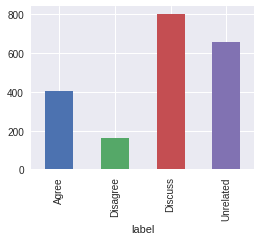

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3))
df.groupby('label').headline.count().plot.bar(ylim=0)
plt.show()

In [0]:
df.groupby('label').headline.count()

label
Agree        405
Disagree     164
Discuss      802
Unrelated    658
Name: headline, dtype: int64

<h3>labels</h3>

In [0]:
from io import StringIO
col = ['headline', 'label']
df = df[col]
df = df[pd.notnull(df['headline'])]
df.columns = ['headline', 'label']
df['label_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['label_id', 'label']].values)
# df.head()

In [0]:
!pip install joblib

In [0]:
import joblib
hc_bow = joblib.load("hc_bow.pkl")
hc_tfidf = joblib.load("hc_tfidf.pkl")
hc_w2v = joblib.load("hc_w2v.pkl")

<h2>headline - claim</h2>

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


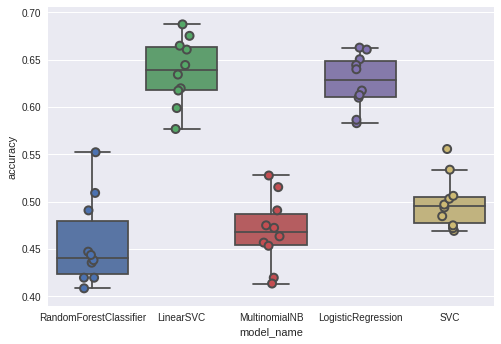

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

X = hc_tfidf
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

models = [
    RandomForestClassifier(n_estimators=20, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SVC()
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
print('tfidf features of headline-claim')
cv_df.groupby('model_name').accuracy.mean()

tfidf features of headline-claim


model_name
LinearSVC                 0.637789
LogisticRegression        0.626608
MultinomialNB             0.468809
RandomForestClassifier    0.456500
SVC                       0.499022
Name: accuracy, dtype: float64

tfidf - headline-claim - logistic regression


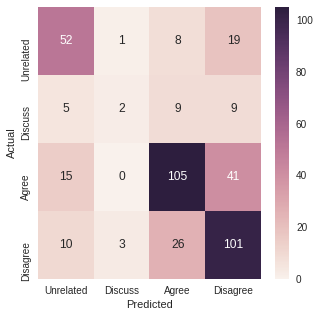

              precision    recall  f1-score   support

   Unrelated       0.63      0.65      0.64        80
     Discuss       0.33      0.08      0.13        25
       Agree       0.71      0.65      0.68       161
    Disagree       0.59      0.72      0.65       140

   micro avg       0.64      0.64      0.64       406
   macro avg       0.57      0.53      0.53       406
weighted avg       0.63      0.64      0.63       406

0.6403940886699507


In [0]:
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=0, solver="newton-cg", multi_class="multinomial" )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('tfidf - headline-claim - logistic regression')
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

tfidf - headline-claim - SVM


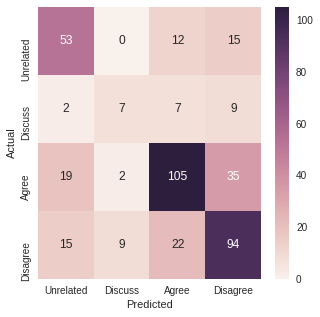

              precision    recall  f1-score   support

   Unrelated       0.60      0.66      0.63        80
     Discuss       0.39      0.28      0.33        25
       Agree       0.72      0.65      0.68       161
    Disagree       0.61      0.67      0.64       140

   micro avg       0.64      0.64      0.64       406
   macro avg       0.58      0.57      0.57       406
weighted avg       0.64      0.64      0.64       406

0.6379310344827587


In [0]:
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('tfidf - headline-claim - SVM')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

tfidf - headline-claim - SVM


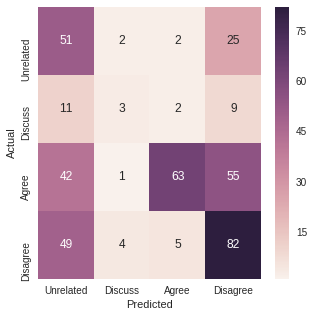

              precision    recall  f1-score   support

   Unrelated       0.33      0.64      0.44        80
     Discuss       0.30      0.12      0.17        25
       Agree       0.88      0.39      0.54       161
    Disagree       0.48      0.59      0.53       140

   micro avg       0.49      0.49      0.49       406
   macro avg       0.50      0.43      0.42       406
weighted avg       0.60      0.49      0.49       406

0.49014778325123154


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = hc_tfidf
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))

import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('tfidf - headline-claim - NB')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

bow - headline-claim - NB


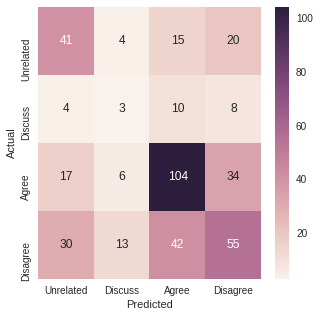

              precision    recall  f1-score   support

   Unrelated       0.45      0.51      0.48        80
     Discuss       0.12      0.12      0.12        25
       Agree       0.61      0.65      0.63       161
    Disagree       0.47      0.39      0.43       140

   micro avg       0.50      0.50      0.50       406
   macro avg       0.41      0.42      0.41       406
weighted avg       0.50      0.50      0.50       406

0.5


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = hc_bow
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))

import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('bow - headline-claim - NB')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

tfidf - headline-claim - RF


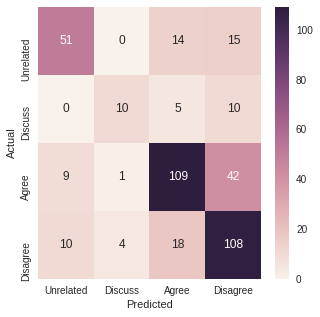

              precision    recall  f1-score   support

   Unrelated       0.73      0.64      0.68        80
     Discuss       0.67      0.40      0.50        25
       Agree       0.75      0.68      0.71       161
    Disagree       0.62      0.77      0.69       140

   micro avg       0.68      0.68      0.68       406
   macro avg       0.69      0.62      0.64       406
weighted avg       0.69      0.68      0.68       406

0.6847290640394089


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = hc_tfidf
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))

import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('tfidf - headline-claim - RF')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

tfidf - headline-claim - RF


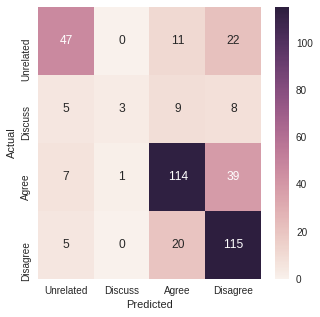

              precision    recall  f1-score   support

   Unrelated       0.73      0.59      0.65        80
     Discuss       0.75      0.12      0.21        25
       Agree       0.74      0.71      0.72       161
    Disagree       0.62      0.82      0.71       140

   micro avg       0.69      0.69      0.69       406
   macro avg       0.71      0.56      0.57       406
weighted avg       0.70      0.69      0.67       406

0.687192118226601


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = hc_bow
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))

import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('bow - headline-claim - RF')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

w2v - headline-claim - RF


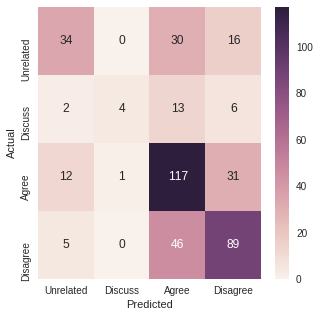

              precision    recall  f1-score   support

   Unrelated       0.64      0.42      0.51        80
     Discuss       0.80      0.16      0.27        25
       Agree       0.57      0.73      0.64       161
    Disagree       0.63      0.64      0.63       140

   micro avg       0.60      0.60      0.60       406
   macro avg       0.66      0.49      0.51       406
weighted avg       0.62      0.60      0.59       406

0.6009852216748769


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = hc_w2v
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))

import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('w2v - headline-claim - RF')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

0.39173228346456695
              precision    recall  f1-score   support

   Unrelated       0.00      0.00      0.00       102
     Discuss       0.00      0.00      0.00        48
       Agree       0.39      1.00      0.56       199
    Disagree       0.00      0.00      0.00       159

   micro avg       0.39      0.39      0.39       508
   macro avg       0.10      0.25      0.14       508
weighted avg       0.15      0.39      0.22       508

headline-claim - Majority


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


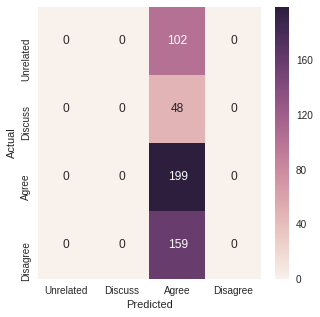

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

np.random.seed(4)
X_train, X_test, y_train, y_test = train_test_split(
   hc_tfidf, labels, test_size=0.25, random_state=100)

clf_maj = DummyClassifier(strategy='most_frequent', random_state=None, constant=None)
clf_maj.fit(X_train, y_train)

y_pred = clf_maj.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('headline-claim - Majority')
plt.show()


In [0]:
X = hc_bow
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

models = [
    RandomForestClassifier(n_estimators=20, max_depth=3, random_state=0),
    LinearSVC(max_iter=10000),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver="newton-cg", multi_class="multinomial"),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
print('BOW + similarity + imp_words')
plt.show()

NameError: ignored

In [0]:
print('bow features of headline-claim')
cv_df.groupby('model_name').accuracy.mean()

bow features of headline-claim


model_name
LinearSVC                 0.619258
LogisticRegression        0.606317
MultinomialNB             0.491667
RandomForestClassifier    0.395576
Name: accuracy, dtype: float64

bow - headline-claim - logistic regression


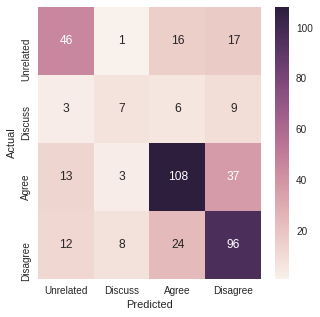

              precision    recall  f1-score   support

   Unrelated       0.62      0.57      0.60        80
     Discuss       0.37      0.28      0.32        25
       Agree       0.70      0.67      0.69       161
    Disagree       0.60      0.69      0.64       140

   micro avg       0.63      0.63      0.63       406
   macro avg       0.57      0.55      0.56       406
weighted avg       0.63      0.63      0.63       406

0.6330049261083743


In [0]:
X = hc_bow
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

model = LogisticRegression(random_state=0, solver="newton-cg", multi_class="multinomial" )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('bow - headline-claim - logistic regression')
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

bow - headline-claim - SVM


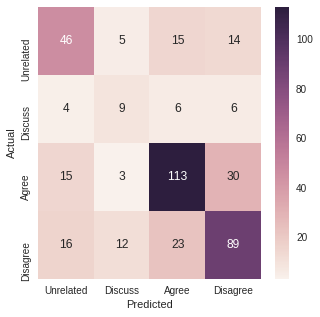

              precision    recall  f1-score   support

   Unrelated       0.57      0.57      0.57        80
     Discuss       0.31      0.36      0.33        25
       Agree       0.72      0.70      0.71       161
    Disagree       0.64      0.64      0.64       140

   micro avg       0.63      0.63      0.63       406
   macro avg       0.56      0.57      0.56       406
weighted avg       0.64      0.63      0.63       406

0.6330049261083743


In [0]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('bow - headline-claim - SVM')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


w2v + similarity + imp_words


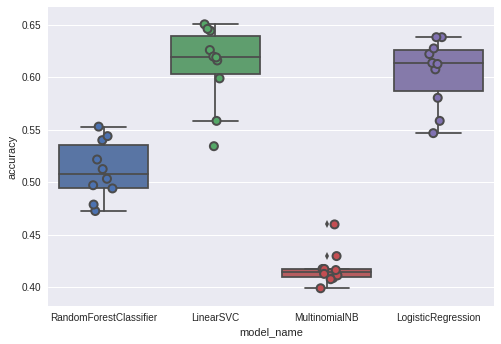

In [0]:
X = hc_w2v
y = labels
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

models = [
    RandomForestClassifier(n_estimators=20, max_depth=3, random_state=0),
    LinearSVC(max_iter=10000),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver="newton-cg", multi_class="multinomial"),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
print('w2v + similarity + imp_words')
plt.show()

In [0]:
print('w2v features of headline-claim')
cv_df.groupby('model_name').accuracy.mean()

w2v features of headline-claim


model_name
LinearSVC                 0.611165
LogisticRegression        0.604383
MultinomialNB             0.417784
RandomForestClassifier    0.511510
Name: accuracy, dtype: float64

w2v - headline-claim - logistic regression


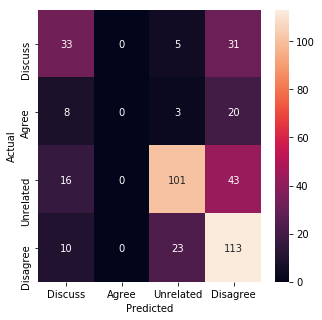

G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    Discuss       0.49      0.48      0.49        69
      Agree       0.00      0.00      0.00        31
  Unrelated       0.77      0.63      0.69       160
   Disagree       0.55      0.77      0.64       146

avg / total       0.58      0.61      0.59       406



In [0]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('w2v - headline-claim - logistic regression')
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

w2v - headline-claim - SVM


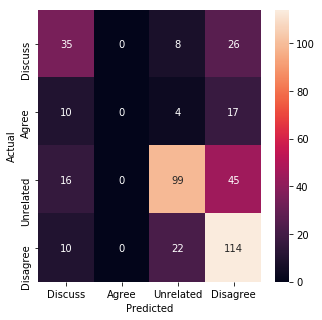

G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    Discuss       0.49      0.51      0.50        69
      Agree       0.00      0.00      0.00        31
  Unrelated       0.74      0.62      0.68       160
   Disagree       0.56      0.78      0.66       146

avg / total       0.58      0.61      0.59       406



In [0]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print('w2v - headline-claim - SVM')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))